In [2]:
# including the project directory to the notebook level
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
# import modules
from alumni_scripts import alumni_data_utils as a_utils
import json
import pandas as pd

In [4]:
with open('../alumni_scripts/meta_data.json', 'r') as fp:
        meta_data_ = json.load(fp)
scaler = a_utils.dataframescaler(meta_data_['column_stats_half_hour'])

In [5]:
df_ = a_utils.readcsv('../tmp/rl_perf_data/EnvId0-results.csv')
df_['datetime'] = pd.to_datetime(df_['datetime'])
df_.set_index(keys='datetime',inplace=True, drop = True)
df_ = a_utils.dropNaNrows(df_)

df_delta = df_[['delta_unscaled']]
df_.drop(columns=['delta_unscaled'], inplace =True)

In [6]:
df_.columns

Index(['rl_cwe', 'rl_hwe', 'hist_cwe', 'hist_hwe', 'reward_energy',
       'reward_comfort', 'oat', 'oah', 'wbt', 'T_rl_disch', 'avg_stpt'],
      dtype='object')

In [7]:
meta_data_['column_stats_half_hour'].keys()

dict_keys(['pchwst', 'vrf50', 'oat', 'sat', 'sat_stpt', 'oah', 'vrf67', 'pchw_flow', 'hwe', 'vrf1', 'vrf30', 'vrf34', 'vrf74', 'cwe', 'hws_st_stpt', 'vrf60', 'vrf63', 'hws_st', 'hws_vlv1', 'vrf77', 'vrf64', 'vrf10', 'ee', 'hws_rt', 'vrf100', 'vrf40', 'hws_flow', 'vrf108', 'vrf20', 'wbt', 'avg_stpt'])

In [8]:
df = df_.copy()

In [9]:
scaling_cols = ['cwe','hwe','cwe','hwe','oat', 'oah', 'wbt','sat_stpt','avg_stpt']
to_scale = ['rl_cwe', 'rl_hwe', 'hist_cwe', 'hist_hwe','oat', 'oah', 'wbt', 'T_rl_disch', 'avg_stpt']
df_[to_scale] = scaler.minmax_inverse_scale(df_[to_scale], scaling_cols, to_scale)

In [10]:
df_['rl_total_e'] = df_['rl_hwe']+df_['rl_cwe']
df_['hist_total_e'] = df_['hist_hwe']+df_['hist_cwe']

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


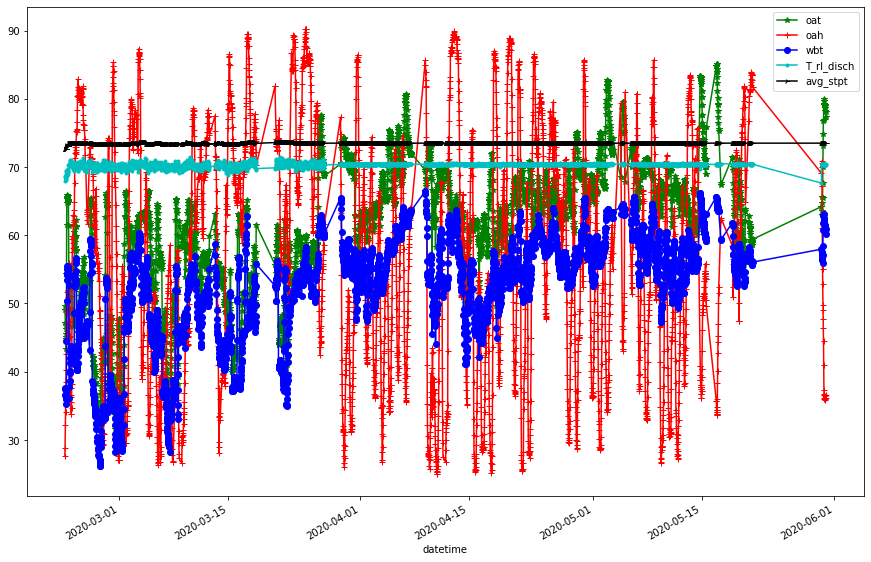

In [11]:
df_.plot(y=['oat', 'oah', 'wbt', 'T_rl_disch', 'avg_stpt'],
         figsize=(15, 10),
         style=['g*-', 'r+-', 'bo-', 'c.-', 'k4-'])

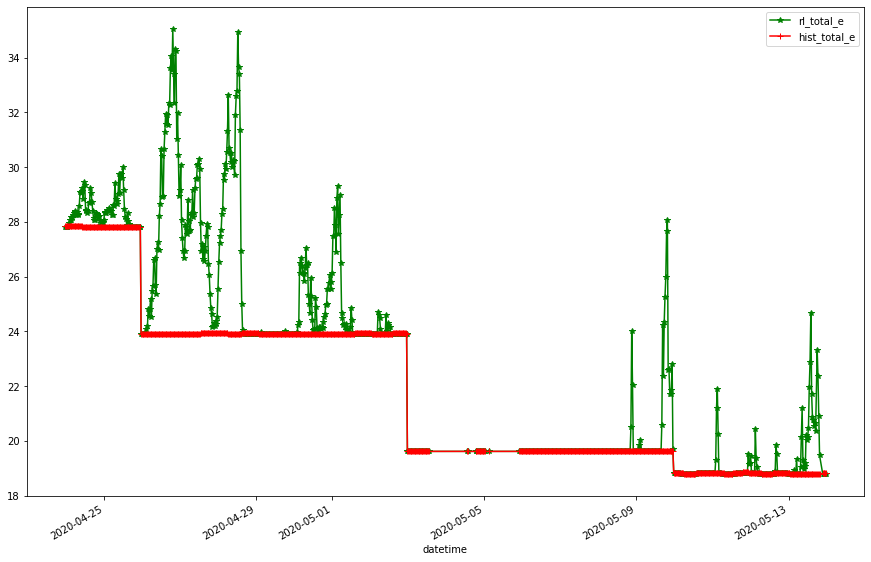

In [12]:
df_.loc['2020-04-23 23:30:00+00:00':'2020-05-13 23:30:00+00:00', :].plot(
    y=['rl_total_e', 'hist_total_e'], figsize=(15, 10), style=['g*-', 'r+-'])

In [13]:
df_.describe()

,rl_cwe,rl_hwe,hist_cwe,hist_hwe,reward_energy,reward_comfort,oat,oah,wbt,T_rl_disch,avg_stpt,rl_total_e,hist_total_e
count,3536.000000,3.536000e+03,3.536000e+03,3.536000e+03,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3.536000e+03
mean,30.179357,1.326137e+01,3.187161e+01,8.131533e+00,-1.632636,3.634923,61.779209,57.036044,52.878079,70.326543,73.490796,43.440722,4.000314e+01
std,8.588537,1.866165e+01,1.069101e+01,1.456172e+01,2.948158,2.739163,9.363902,17.282542,7.696090,0.289586,0.069695,24.243618,2.068999e+01
min,0.106847,-3.441691e-15,-4.263256e-14,-3.441691e-15,-16.604187,-5.967139,31.585212,25.016642,26.115312,67.648198,72.630977,0.106847,-4.607426e-14
25%,23.918425,-3.441691e-15,2.392212e+01,-3.441691e-15,-1.916305,2.920277,57.236923,42.121133,49.620548,70.299683,73.502665,25.679817,2.392302e+01
50%,29.680893,2.393975e+00,3.080392e+01,-3.441691e-15,-0.169701,3.124005,63.205956,57.321067,54.396827,70.385545,73.502665,31.865133,3.145511e+01
75%,38.940534,2.256252e+01,4.177456e+01,1.216300e+01,-0.000000,3.834462,67.888013,71.094872,58.130420,70.445725,73.502665,64.321636,5.822638e+01
max,48.238241,8.420211e+01,7.591211e+01,7.676368e+01,2.558066,34.409905,85.056192,90.252874,66.473413,71.464145,73.624469,115.861046,1.084539e+02


# Code cemetery

In [63]:
with open('../alumni_scripts/meta_data.json', 'r') as fp:
        meta_data_ = json.load(fp)
stats = pd.DataFrame(meta_data_['column_stats_half_hour'])
stpt_cols = [ele for ele in stats.columns if 'vrf' in ele]

average = np.mean(stats[stpt_cols].loc['mean',:])
std = np.sqrt(np.mean(np.square(stats[stpt_cols].loc['std',:])))
count = 23585.000000
min_ = np.mean(stats[stpt_cols].loc['min',:])
max_ = np.mean(stats[stpt_cols].loc['max',:])
twentyfive_pct = np.mean(stats[stpt_cols].loc['25%',:])
fifty_pct = np.mean(stats[stpt_cols].loc['50%',:])
seventyfive_pct = np.mean(stats[stpt_cols].loc['75%',:])

print(count)
print(average)
print(std)
print(min_)
print(twentyfive_pct)
print(fifty_pct)
print(seventyfive_pct)
print(max_)

23585.0
72.34724565990625
2.1259780091755456
68.0111111111111
71.4
72.73333333333333
73.53333333333333
74.93333333333334


2.1259780091755456

In [15]:
# including the project directory to the notebook level
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import numpy as np
import pandas as pd
import json
import warnings
from alumni_scripts import alumni_data_utils as a_utils
with warnings.catch_warnings():
    from stable_baselines import PPO2

In [16]:
with open('../alumni_scripts/meta_data.json', 'r') as fp:
    meta_data_ = json.load(fp)

In [17]:
col_names = ['oat', 'oah', 'wbt', 'avg_stpt', 'sat']
scaler = a_utils.dataframescaler(meta_data_['column_stats_half_hour'])

In [ ]:
with warnings.catch_warnings():
    rl_agent = PPO2.load('../models/best_rl_agent')

In [25]:
 obs = scaler.minmax_scale(np.array([70.9048, 45.9272, 42.6174, 72.2000, 68.1530]),col_names,col_names)

In [26]:
rl_agent.predict(obs, deterministic=False)

(array([-1.062931], dtype=float32), None)

In [44]:
rl_agent.action_probability(obs, actions=None)

array([[-1.8351847]], dtype=float32)

In [51]:
rl_agent.action_probability(obs, actions=np.array([1.50]), logp=False)

array([0.00173691])